In [1]:
import Soccer as s
import pandas as pd
import numpy as np

In [2]:
# Data
games = [
    (['Vojta1', 'Vojta2', 'Krystof'], ['Vdolek', 'Marta', 'Vanan'], 10, 8),
    (['Marta', 'Vojta1', 'Krystof'], ['Vdolek', 'Vojta2', 'Vanan'], 2, 5),

    (['Marek', 'Vojta2', 'Vdolek'], ['Vojta1', 'Vanan', 'Marta'], 11, 13),
    (['Marta', 'Vojta2', 'Marek'], ['Vdolek', 'Vojta1', 'Vanan'], 6, 2),

    (['Krystof', 'Panek', 'Vojta2'], ['Vanan', 'Klizka', 'Marek'], 10, 2),
    (['Panek', 'Klizka', 'Vojta2'], ['Vanan', 'Krystof', 'Marek'], 10, 4),
    (['Krystof', 'Vanan', 'Vojta2'], ['Klizka', 'Panek', 'Marek'], 10, 5),

    (['Krystof', '-_-', 'Marta'], ['Vojta2', 'Vojta1', 'Vdolek'], 11, 9),
    (['Krystof', '-_-', 'Vdolek'], ['Vojta2', 'Vojta1', 'Marta'], 9, 11),

    (['Vojta2', 'Roman', 'Filip'], ['Vanan', 'Panek', 'Marta'], 10, 6),
    (['Vojta2', 'Marta', 'Filip'], ['Vanan', 'Panek', 'Roman'], 3, 9),

    (['Vojta2', 'Roman', 'Marta'], ['Vanan', 'Filip', 'Krystof'], 10, 7),
    (['Vojta2', 'Roman', 'Filip'], ['Vanan', 'Marta', 'Krystof'], 2, 10),

    (['Filip', 'Roman', 'Marta'], ['Vanan', 'Vojta2', 'Krystof'], 6, 10),
    (['Vojta2', 'Roman', 'Marta'], ['Vanan', 'Filip', 'Krystof'], 3, 3),

    (['Michal', 'Vanan', 'Vojta2'], ['Filip', 'Vojta1', 'Marta'], 10, 4),
    (['Vojta2', 'Vojta1', 'Marta'], ['Michal', 'Filip', 'Vanan'], 3, 8),

    (['Michal', 'Vanan', 'Vojta2'], ['Krystof', 'Vojta1', 'Marta'], 10, 7),
    (['Vojta2', 'Vojta1', 'Marta'], ['Michal', 'Krystof', 'Vanan'], 10, 9),

    (['Vojta1', 'Krystof', 'Vojta2'], ['Vanan', 'Filip', 'Roman'], 10, 8),
    (['Vanan', 'Roman', 'Vojta2'], ['Vojta1', 'Krystof', 'Filip'], 11, 9),

    (['Vojta2', 'Krystof', 'Vdolek'], ['Marek', 'Filip', 'Marta'], 10, 2),
    (['Marta', 'Filip', 'Vojta2'], ['Vdolek', 'Krystof', 'Marek'], 10, 5),
    (['Marek', 'Filip', 'Vojta2'], ['Krystof', 'Vdolek', 'Marta'], 10, 8),

    (['Krystof', 'Vojta1', 'Vojta2'], ['Vanan', 'Filip', 'Skleny'], 2, 10),
    (['Skleny', 'Vojta1', 'Vojta2'], ['Vanan', 'Filip', 'Krystof'], 7, 10),

    (['Vojta2', 'Krystof', 'Filip'], ['Vanan', 'Vojta1', 'Marta'], 10, 1),
    (['Vojta2', 'Marta', 'Filip'], ['Vanan', 'Vojta1', 'Krystof'], 10, 7),
    
    (['Vojta2', 'Krystof', 'Filip'], ['Skleny', 'Roman', 'Michal'], 2, 10),
    (['Vojta2', 'Krystof', 'Michal'], ['Skleny', 'Roman', 'Filip'], 1, 10),
    (['Vojta2', 'Krystof', 'Roman'], ['Skleny', 'Michal', 'Filip'], 4, 10),
]

In [3]:
# Reset the previous data and evaluate all games
s.reset()
for match in games:
    s.eval_match(match[0], match[1], match[2], match[3])

In [4]:
df1 = pd.DataFrame(columns=['player', 'elo', 'trueskill'])

for player in s.p.values():
    df1 = df1.append({
        'player': player.name, 
        'elo': player.last_rating('elo'), 
        'trueskill': player.last_rating('trueskill').mu - 3*player.last_rating('trueskill').sigma
    }, ignore_index=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# Elo scatter

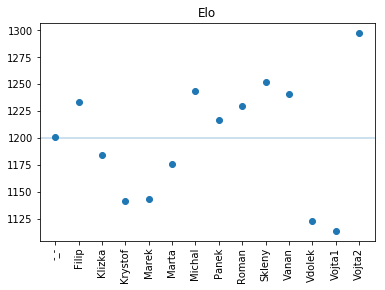

In [6]:
plt.title('Elo')
plt.scatter(df1['player'], df1['elo'])
plt.xticks(rotation=90)
plt.axhline(y=df1['elo'].mean(), alpha=0.3)

# TrueSkill scatter

In [ ]:
plt.title('TrueSkill')
plt.scatter(df1['player'], df1['trueskill'])
plt.xticks(rotation=90)
plt.axhline(y=df1['trueskill'].mean(), alpha=0.3)

# Progress of Elo

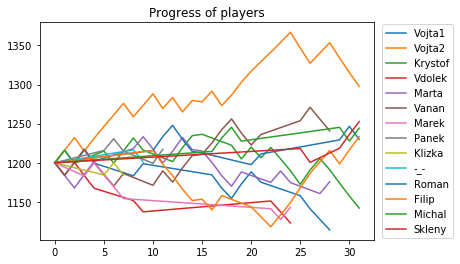

In [8]:
df2 = pd.DataFrame(columns=['player', 'elos'])

for player in s.p:
    elos = s.get_player(player)[0]
    df2 = df2.append({
        'player': player,
        'elos': elos
    }, ignore_index=True)

plt.title('Progress of players')
for index, row in df2.iterrows():
    plt.plot(df2.iloc[index]['elos'].keys(), df2.iloc[index]['elos'].values())
    
plt.legend(df2['player'], loc=5, bbox_to_anchor=(1.25, 0.5))

In [35]:
df2['player']

0      Vojta1
1      Vojta2
2     Krystof
3      Vdolek
4       Marta
5       Vanan
6       Marek
7       Panek
8      Klizka
9         -_-
10      Roman
11      Filip
12     Michal
13     Skleny
Name: player, dtype: object

In [32]:
len(df2)

14

In [33]:
df3 = pd.DataFrame(columns=['player', 'elos'])

In [34]:
len(df3)

0